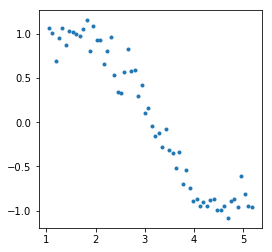

    x    y  x_2  x_3  x_4  x_5  x_6  x_7  x_8  x_9  x_10  x_11  x_12  x_13  \
0   1  1.1  1.1  1.1  1.2  1.3  1.3  1.4  1.4  1.5   1.6   1.7   1.7   1.8   
1 1.1    1  1.2  1.4  1.6  1.7  1.9  2.2  2.4  2.7     3   3.4   3.8   4.2   
2 1.2  0.7  1.4  1.7    2  2.4  2.8  3.3  3.9  4.7   5.5   6.6   7.8   9.3   
3 1.3 0.95  1.6    2  2.5  3.1  3.9  4.9  6.2  7.8   9.8    12    16    19   
4 1.3  1.1  1.8  2.3  3.1  4.1  5.4  7.2  9.6   13    17    22    30    39   

   x_14  x_15  
0   1.9     2  
1   4.7   5.3  
2    11    13  
3    24    31  
4    52    69  


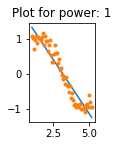

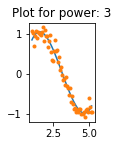

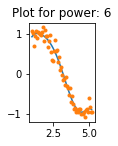

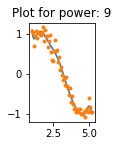

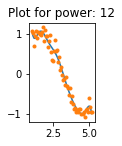

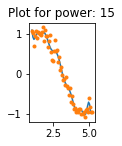

              rss intercept coef_x_1 coef_x_2 coef_x_3 coef_x_4 coef_x_5  \
model_pow_1   3.3         2    -0.62      NaN      NaN      NaN      NaN   
model_pow_2   3.3       1.9    -0.58   -0.006      NaN      NaN      NaN   
model_pow_3   1.1      -1.1        3     -1.3     0.14      NaN      NaN   
model_pow_4   1.1     -0.27      1.7    -0.53   -0.036    0.014      NaN   
model_pow_5     1         3     -5.1      4.7     -1.9     0.33   -0.021   
model_pow_6  0.99      -2.8      9.5     -9.7      5.2     -1.6     0.23   
model_pow_7  0.93        19      -56       69      -45       17     -3.5   
model_pow_8  0.92        43 -1.4e+02  1.8e+02 -1.3e+02       58      -15   
model_pow_9  0.87   1.7e+02 -6.1e+02  9.6e+02 -8.5e+02  4.6e+02 -1.6e+02   
model_pow_10 0.87   1.4e+02 -4.9e+02  7.3e+02   -6e+02  2.9e+02      -87   
model_pow_11 0.87       -75  5.1e+02 -1.3e+03  1.9e+03 -1.6e+03  9.1e+02   
model_pow_12 0.87  -3.4e+02  1.9e+03 -4.4e+03    6e+03 -5.2e+03  3.1e+03   
model_pow_13

In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from matplotlib import pyplot as PLT
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

fig = PLT.figure()
rcParams['figure.figsize'] = 4, 4

#Define input array with angles from 60deg to 300deg converted to radians

x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')
plt.show()

for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print (data.head())


def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    #ax1 = fig.add_subplot(211)
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        PLT.subplot(models_to_plot[power])
        #PLT.tight_layout()
        PLT.plot(data['x'],y_pred)
        PLT.plot(data['x'],data['y'],'.')
        PLT.title('Plot for power: %d'%power)
        PLT.show()
    #plt.show()
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
print(coef_matrix_simple)

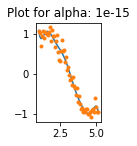

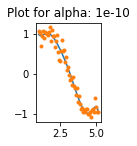

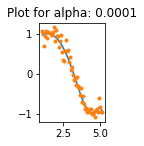

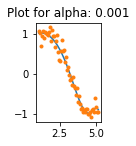

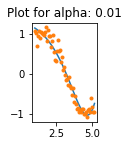

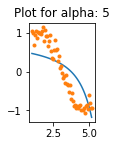

              rss intercept coef_x_1 coef_x_2 coef_x_3 coef_x_4 coef_x_5  \
alpha_1e-15  0.87        94   -3e+02  3.8e+02 -2.3e+02       65     0.49   
alpha_1e-10  0.92        11      -29       31      -15      2.9     0.17   
alpha_1e-08  0.95       1.3     -1.5      1.7    -0.68    0.039    0.016   
alpha_0.0001 0.96      0.56     0.55    -0.13   -0.026  -0.0028 -0.00011   
alpha_0.001     1      0.82     0.31   -0.087    -0.02  -0.0028 -0.00022   
alpha_0.01    1.4       1.3   -0.088   -0.052    -0.01  -0.0014 -0.00013   
alpha_1       5.6      0.97    -0.14   -0.019   -0.003 -0.00047   -7e-05   
alpha_5        14      0.55   -0.059  -0.0085  -0.0014 -0.00024 -4.1e-05   
alpha_10       18       0.4   -0.037  -0.0055 -0.00095 -0.00017   -3e-05   
alpha_20       23      0.28   -0.022  -0.0034  -0.0006 -0.00011   -2e-05   

             coef_x_6 coef_x_7 coef_x_8 coef_x_9 coef_x_10 coef_x_11  \
alpha_1e-15      -4.3     0.45     0.18   -0.027   -0.0065    0.0011   
alpha_1e-10    -0.0

In [4]:
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        PLT.subplot(models_to_plot[alpha])
        #plt.tight_layout()
        PLT.plot(data['x'],y_pred)
        PLT.plot(data['x'],data['y'],'.')
        PLT.title('Plot for alpha: %.3g'%alpha)
        PLT.show()
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret


#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])
#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
print(coef_matrix_ridge)